This notebook provides Python code to read UV-Vis spectrsocopy data in the excel file generated from the spectrophotometer, save them into numpy files readable by the `UVVisExperiemnt` class in the `activephasemap` code, and visualzie them using `matplotlib`.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
sys.path.append("./")
from utils import plot_phasemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob 

In [2]:
ITERATION = 15
bounds = np.asarray([(0.0, 35.0), (0.0, 35.0)]).T 

In [3]:
uvvis_data = pd.read_excel("./uvvis/itr_%d.xlsx"%ITERATION, engine='openpyxl')
water_uvvis = pd.read_excel("./uvvis/water.xlsx", engine='openpyxl')
# The background UV-Vis from water is collected saved seperately
water = water_uvvis.iloc[:,-1].to_numpy()
wavelength = uvvis_data["Wavelength"].to_numpy()
well_names = uvvis_data.columns[1:].to_numpy()
print(well_names)

['E7' 'E8' 'E9' 'E10' 'E11' 'E12']


In [4]:
volumes = pd.read_csv("./opentrons/volumes_%d.csv"%ITERATION)

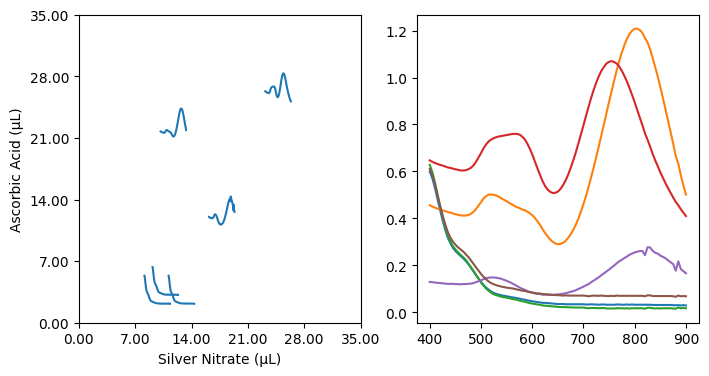

In [5]:
spectra = []
for well_name in well_names:
    y = uvvis_data[well_name].values-water
    spectra.append(y)

spectra = np.asarray(spectra)
fig, axs = plt.subplots(1,2, figsize=(2*4,4))
comps = np.vstack((volumes['SN'].values, volumes['AA'].values)).T
plot_phasemap(bounds, axs[0], comps, spectra)
axs[0].set_xlabel("Silver Nitrate (µL)")
axs[0].set_ylabel("Ascorbic Acid (µL)")

for si in spectra:
    axs[1].plot(wavelength, si)
plt.show()

In [6]:
np.save("./data/spectra_%d.npy"%ITERATION, spectra)
np.save("./data/wav.npy", wavelength)

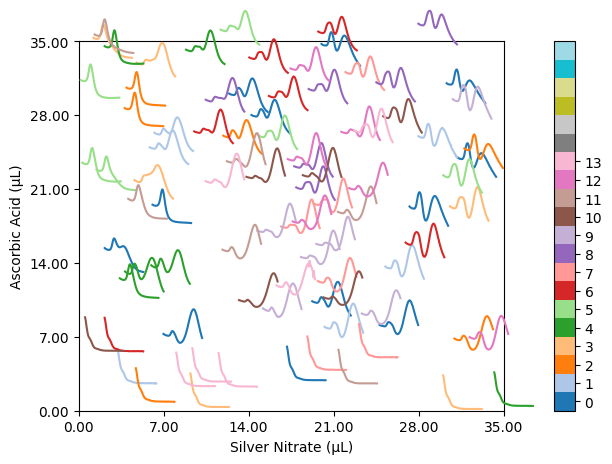

In [7]:
cmap = plt.get_cmap("tab20")
norm = Normalize(vmin=0, vmax = 20)
mappable = ScalarMappable(norm=norm, cmap=cmap)
iters = len(glob.glob("./data/spectra_*.npy"))

fig, ax = plt.subplots()
for itr in range(iters):
    comps = np.load("./data/comps_%d.npy"%itr)
    spectra = np.load("./data/spectra_%d.npy"%itr)

    plot_phasemap(bounds, ax, comps, spectra, color=cmap(norm(itr)))
    ax.set_xlabel("Silver Nitrate (µL)")
    ax.set_ylabel("Ascorbic Acid (µL)")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
cbar = fig.colorbar(mappable, cax=cax)
cbar.set_ticks(np.arange(iters)+0.5)
cbar.set_ticklabels(np.arange(iters))
plt.show()
